
Salary dataset (first 20 rows):
 gender   salary
   men  89900.0
   men  56200.0
   men 105100.0
   men 112300.0
   men  40800.0
   men  51200.0
   men  84500.0
   men  72400.0
   men  80300.0
   men  60000.0
   men 110000.0
   men 106100.0
   men  82700.0
   men 119900.0
   men  95200.0
   men  59800.0
   men  92000.0
   men  57800.0
   men 109900.0
   men  79400.0


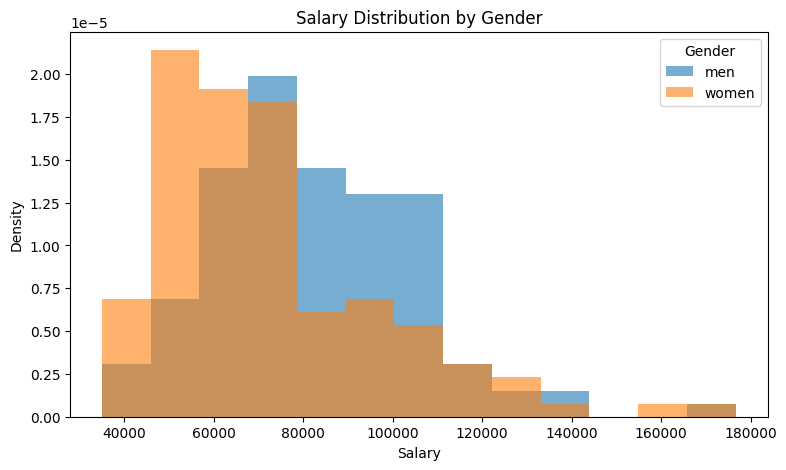


Summary statistics:
 gender  count     mean  median      std     min      max
   men    120 82121.67 79850.0 22615.86 40800.0 171000.0
 women    120 72615.83 66350.0 25504.14 35000.0 176700.0


('/mnt/data\\salary.csv', '/mnt/data\\req11_salary_distribution.png')

In [1]:
# === REQUIREMENT 11 — ONE-CELL, SELF-CONTAINED (JUPYTER) ===
# Task: Construct salary.csv (gender, salary) and show the distribution of salaries
#       for men and women in a single chart.
# Notes:
#   - Uses Matplotlib only (no seaborn). One chart, no subplots, no explicit colors.
#   - Creates a reproducible synthetic dataset you can edit.
#   - Saves CSV and figure for your report.

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------- 0) Generate/EDIT dataset ----------
# Reproducible random data; edit 'n_each' or 'mean/std' per gender if needed
rng = np.random.default_rng(42)
n_each = 120

# Simulate annual salary (USD) using lognormal-like distributions
# (Women and men centered differently just for demonstration; edit as you see fit)
men_salaries = np.round(rng.lognormal(mean=11.3, sigma=0.35, size=n_each) / 100) * 100
women_salaries = np.round(rng.lognormal(mean=11.15, sigma=0.32, size=n_each) / 100) * 100

# Optional clamp to a reasonable range
men_salaries = np.clip(men_salaries, 20000, 300000)
women_salaries = np.clip(women_salaries, 20000, 300000)

data = (
    [("men", float(s)) for s in men_salaries] +
    [("women", float(s)) for s in women_salaries]
)

df = pd.DataFrame(data, columns=["gender", "salary"])

# ---------- 1) Save CSV and display ----------
save_dir = "/mnt/data"
os.makedirs(save_dir, exist_ok=True)
csv_path = os.path.join(save_dir, "salary.csv")
df.to_csv(csv_path, index=False)

try:
    from caas_jupyter_tools import display_dataframe_to_user
    display_dataframe_to_user("Requirement 11 - salary.csv", df)
except Exception:
    print("\nSalary dataset (first 20 rows):\n", df.head(20).to_string(index=False))

# ---------- 2) Plot distribution (single chart) ----------
plt.figure(figsize=(9,5))

# Choose common bins from combined data so histograms are comparable
combined = np.concatenate([men_salaries, women_salaries])
bins = np.histogram_bin_edges(combined, bins="auto")

plt.hist(men_salaries, bins=bins, alpha=0.6, density=True, label="men")     # default colors only
plt.hist(women_salaries, bins=bins, alpha=0.6, density=True, label="women") # default colors only

plt.title("Salary Distribution by Gender")
plt.xlabel("Salary")
plt.ylabel("Density")
plt.legend(title="Gender")

fig_path = os.path.join(save_dir, "req11_salary_distribution.png")
plt.savefig(fig_path, bbox_inches="tight")
plt.show()

# ---------- 3) Quick descriptive statistics (optional for verification) ----------
summary = (
    df.groupby("gender")["salary"]
      .agg(count="count", mean="mean", median="median", std="std", min="min", max="max")
      .round(2)
      .reset_index()
)

try:
    from caas_jupyter_tools import display_dataframe_to_user
    display_dataframe_to_user("Requirement 11 - Summary Stats", summary)
except Exception:
    print("\nSummary statistics:\n", summary.to_string(index=False))

(csv_path, fig_path)
